There are 21 corrosions patches in this image.


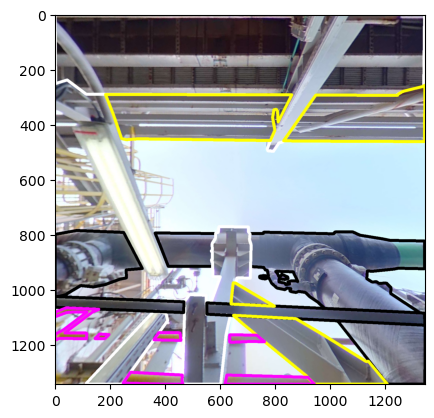

In [24]:
from tqdm.notebook import tqdm
from skimage import measure
import numpy as np
import cv2
from matplotlib import pyplot as plt
%matplotlib inline

img_name = "cubemap_P74_c69c7c2acffc0afcee64f73cb1358c2f_negy"

img = cv2.imread(f"SISTEMAS_UFF/Images/{img_name}.png")
if img_name.endswith("PosX"):
    pass
elif img_name.endswith("NegX"):
    pass
elif img_name.endswith("negy"):
    img = cv2.rotate(img, cv2.ROTATE_90_CLOCKWISE)
    pass
elif img_name.endswith("PosY"):
    img = cv2.rotate(img, cv2.ROTATE_90_COUNTERCLOCKWISE)
    pass
elif img_name.endswith("PosZ"):
    pass
elif img_name.endswith("NegZ"):
    pass

#img = cv2.rotate(img, cv2.ROTATE_90_CLOCKWISE)

color_list = [(0, 0, 0),(0, 0, 255),(0, 255, 0),(0, 255, 255),(255, 0, 0),(255, 0, 255),(255, 255, 0),(255, 255, 255)]

with open(f"SISTEMAS_UFF/export-v3/output/{img_name}.txt") as file:
    Lines = file.readlines()
    
    count = 0
    # Strips the newline character
    print(f"There are {len(Lines)} corrosions patches in this image.")
    color = 0
    for line in Lines:
        classe = line.strip().split()[0]
        polygons = line.strip().split()[1:]
        polygon_point_count = len(polygons)
        polygon_point_list = []
        #print(polygon_point_count)
        for i in range(int(polygon_point_count/2)):
            x = float(polygons[(i*2)])*img.shape[0]
            y = float(polygons[(i*2)+1])*img.shape[1]
            #print(f"[x = {x},",end = "")
            #print(f"y = {y}]", end = ",")
            
            polygon_point_list.append((x,y))
        #print("\n")
        #print(polygon_point_list)
        polygon_point_list = np.array(polygon_point_list).reshape((-1,1,2)).astype(np.int32)
        #print(polygon_point_list)
        #print(len(polygon_point_list))
        limit = int(len(polygon_point_list)/2)
        #result = cv2.drawContours(img, polygon_point_list, -1, (0, 0, 255), 30)
        result = cv2.polylines(img, [polygon_point_list], True, color_list[int(classe)%8], thickness=10)
        
        color +=1
        color = color%8
        
cv2.imwrite(f"{img_name}_label.png", img)
plt.imshow(img[:,:,::-1],cmap='gray')
plt.show()
        